**1. 이변수 함수
$$
f(x,y)=xy
$$
에 대하여 learning rate $\eta=1$과 계수 $\beta_1=\beta_2=1/2$로 Adam을 적용하려 한다.**

**(i) 초기 위치 ${\bf x}_0=(1,2)$에서 출발하여 두 발자국 걸어갈때, ${\bf x}_1$, ${\bf x}_2$를 구하시오.**

편미분하여 그레디언트
$$
\nabla f (x,y) = (y,x)
$$
를 구합니다.  
Adam은 Momentum과 RMSProp의 아이디어를 결합한 옵티마이저입니다.  
출발점에서 이전값은 $(0,0)$으로 두고 계산합니다. 
$$
\begin{aligned}
{\bf m_0} &= \beta_1 (0,0) + (1-\beta_1) \nabla f({\bf x_0}) = {1 \over 2} (0,0) + {1 \over 2} (2,1) = (1,{1 \over 2}) \\
{\bf v_0} &= \beta_2 (0,0) + (1-\beta_2) \nabla f({\bf x_0}) \odot \nabla f({\bf x_0}) = {1 \over 2} (0,0) + {1 \over 2}(4,1) = (2,{1 \over 2})
\end{aligned}
$$
실제 신경망을 학습할때는 $\beta_1$과 $\beta_2$을 1에 매우 가까운 값으로 잡는데 이는 원점으로 편향을 일으킵니다.  
Adam에서는 이를 보정해주는 절차가 있습니다.
$$
\begin{aligned}
{\bf \hat m_0} &= {{\bf m_0} \over 1- \beta_1}= 2(1,{1 \over 2}) = (2,1)\\
{\bf \hat v_0} &= {{\bf v_0} \over 1- \beta_2}= 2(2,{1 \over 2}) = (4,1)
\end{aligned}
$$
관성과 학습률 보정을 모두 고려하여 한걸음 내려갑니다.
$$
{\bf x_1} = {\bf x_0} - \eta {1 \over \sqrt{\bf \hat v_0}} \odot{\bf \hat m_0} = (1,2) - {1 \over (2,1)} \odot (2,1) = (0,1)
$$
두번째 걸음입니다.
$$
\begin{aligned}
{\bf m_1} &= \beta_1 (1,{1 \over 2}) + (1-\beta_1) \nabla f({\bf x_1}) = {1 \over 2} (1,{1 \over 2}) + {1 \over 2} (1,0) = (1,{1 \over 4}) \\
{\bf v_1} &= \beta_2 (2,{1 \over 2}) + (1-\beta_2) \nabla f({\bf x_1}) \odot \nabla f({\bf x_1}) = {1 \over 2} (2,{1 \over 2}) + {1 \over 2}(1,0) = ({3 \over 2},{1 \over 4}) \\
{\bf \hat m_1} &= {{\bf m_1} \over 1 - \beta_1^2}= {4 \over 3}(1,{1 \over 4}) = ({4 \over 3},{1 \over 3})\\
{\bf \hat v_1} &= {{\bf v_1} \over 1 - \beta_2^2}= {4 \over 3}({3 \over 2},{1 \over 4}) = (2,{1 \over 3})\\
{\bf x_2} &= {\bf x_1} - \eta {1 \over \sqrt{\bf \hat v_1}} \odot{\bf \hat m_1} = (0,1) - {1 \over (\sqrt{2},{1 \over \sqrt{3}})} \odot ({4 \over 3},{1 \over 3}) = (-{2\sqrt{2} \over 3}, 1- {1 \over \sqrt{3}})
\end{aligned}
$$

**(ii) 코드로 검산하시오**

In [1]:
import sys
sys.path.append('C://Users//HAN//Documents//Deep Learning from Scratch') # 각자의 경로로 수정해주세요.
import numpy as np
from common.optimizer import Adam

optimizer = Adam(1,1/2,1/2)

params = {'x':1.,'y':2.}

def df():
    return {'x': params['y'], 'y' : params['x']}

for step in range(2):
    grads = df()
    optimizer.update(params,grads)
    print(params)

{'x': 7.071067320563174e-08, 'y': 1.0000001414213362}
{'x': -0.942808916113578, 'y': 0.42264990605210795}


In [2]:
print(-2*np.sqrt(2)/3)
print(1-1/np.sqrt(3))

-0.9428090415820635
0.42264973081037416


**2. 이변수 함수
$$
f(x,y)=x^2 + xy
$$
에 대하여 learning rate $\eta=1$과 계수 $\beta_1=\beta_2=1/2$로 Adam을 적용하려 한다.**

**(i) 초기 위치 ${\bf x}_0=(1,1)$에서 출발하여 두 발자국 걸어갈때, ${\bf x}_1$, ${\bf x}_2$를 구하시오.**

편미분하여 그레디언트
$$
\nabla f (x,y) = (2x+y,x)
$$
를 구합니다.  
Adam은 Momentum과 RMSProp의 아이디어를 결합한 옵티마이저입니다.  
출발점에서 이전값은 $(0,0)$으로 두고 계산합니다. 
$$
\begin{aligned}
{\bf m_0} &= \beta_1 (0,0) + (1-\beta_1) \nabla f({\bf x_0}) = {1 \over 2} (0,0) + {1 \over 2} (3,1) = ({3 \over 2},{1 \over 2}) \\
{\bf v_0} &= \beta_2 (0,0) + (1-\beta_2) \nabla f({\bf x_0}) \odot \nabla f({\bf x_0}) = {1 \over 2} (0,0) + {1 \over 2}(9,1) = ({9 \over 2},{1 \over 2})
\end{aligned}
$$
실제 신경망을 학습할때는 $\beta_1$과 $\beta_2$을 1에 매우 가까운 값으로 잡는데 이는 원점으로 편향을 일으킵니다.  
Adam에서는 이를 보정해주는 절차가 있습니다.
$$
\begin{aligned}
{\bf \hat m_0} &= {{\bf m_0} \over 1- \beta_1}= 2({3 \over 2},{1 \over 2}) = (3,1)\\
{\bf \hat v_0} &= {{\bf v_0} \over 1- \beta_2}= 2({9 \over 2},{1 \over 2}) = (9,1)
\end{aligned}
$$
관성과 학습률 보정을 모두 고려하여 한걸음 내려갑니다.
$$
{\bf x_1} = {\bf x_0} - \eta {1 \over \sqrt{\bf \hat v_0}} \odot{\bf \hat m_0} = (1,1) - {1 \over (3,1)} \odot (3,1) = (0,0)
$$
두번째 걸음입니다.
$$
\begin{aligned}
{\bf m_1} &= \beta_1 ({3 \over 2},{1 \over 2}) + (1-\beta_1) \nabla f({\bf x_1}) = {1 \over 2} ({3 \over 2},{1 \over 2}) + {1 \over 2} (0,0) =  ({3 \over 4},{1 \over 4}) \\
{\bf v_1} &= \beta_2 ({9 \over 2},{1 \over 2}) + (1-\beta_2) \nabla f({\bf x_1}) \odot \nabla f({\bf x_1}) = {1 \over 2} ({9 \over 2},{1 \over 2}) + {1 \over 2}(0,0) = ({9 \over 4},{1 \over 4}) \\
{\bf \hat m_1} &= {{\bf m_1} \over 1 - \beta_1^2}= {4 \over 3}({3 \over 4},{1 \over 4}) = (1,{1 \over 3})\\
{\bf \hat v_1} &= {{\bf v_1} \over 1 - \beta_2^2}= {4 \over 3}({9 \over 4},{1 \over 4}) = (3,{1 \over 3})\\
{\bf x_2} &= {\bf x_1} - \eta {1 \over \sqrt{\bf \hat v_1}} \odot{\bf \hat m_1} = (0,0) - {1 \over (\sqrt{3},{1 \over \sqrt{3}})} \odot (1,{1 \over 3}) = (-{1 \over \sqrt{3}}, -{1 \over \sqrt{3}})
\end{aligned}
$$

**(ii) 코드로 검산하시오**

In [3]:
optimizer = Adam(1,1/2,1/2)

params = {'x':1.,'y':1.}

def df():
    return {'x': 2*params['x']+params['y'], 'y' : params['x']}

for step in range(2):
    grads = df()
    optimizer.update(params,grads)
    print(params)

{'x': 4.7140449543903173e-08, 'y': 1.4142133619721164e-07}
{'x': -0.5773502742809837, 'y': -0.5773500667313491}


In [4]:
-1/np.sqrt(3)

-0.5773502691896258

**3. 밑줄 친 부분을 수식으로 바꾸고 이로부터 Adam의 점화식을 이끌어 내시오.**
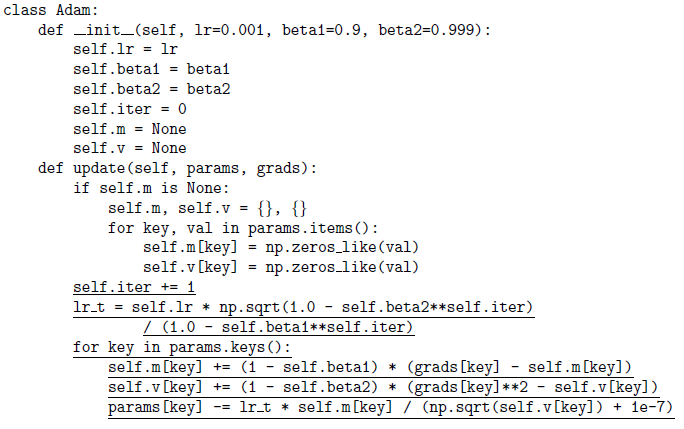

$$
\begin{aligned}
lr_t &= \eta {\sqrt{1 - \beta_2^{n+1}} \over 1-\beta_1^{n+1}} \\
& \\
{\bf m_n} &= {\bf m_{n-1}} + (1-\beta_1)(\nabla f({\bf x_n}) - {\bf m_{n-1}}) \\
&= \beta_1 {\bf m_{n-1}} + (1-\beta_1)\nabla f({\bf x_n}) \\
& \\
{\bf v_n} &= {\bf v_{n-1}} + (1-\beta_2)(\nabla f({\bf x_n}) \odot \nabla f({\bf x_n}) - {\bf v_{n-1}}) \\
&= \beta_2 {\bf v_{n-1}} + (1-\beta_2)\nabla f({\bf x_n}) \odot \nabla f({\bf x_n}) \\
& \\
{\bf x_{n+1}}  &= {\bf x_n} - lr_t {1 \over \sqrt{\bf v_n}} \odot {\bf m_n}\\
&= {\bf x_n} - \eta {\sqrt{1 - \beta_2^{n+1}} \over 1-\beta_1^{n+1}} {1 \over \sqrt{\bf v_n}} \odot {\bf m_n}\\
&= {\bf x_n} - \eta {1 \over \sqrt{{\bf v_n} \over 1 - \beta_2^{n+1}}} \odot {{\bf m_n} \over 1-\beta_1^{n+1}}\\
&= {\bf x_n} - \eta {1 \over \sqrt{\bf \hat v_n}} \odot {\bf \hat m_n}
\end{aligned}
$$